# Sentiment analysis by classifying reviews into 1,2,4 and 5 rating

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from collections import defaultdict

In [2]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
#import all the necessary csv files
parent_dir = 'D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/'

path_dic = {
            'B':parent_dir+'business_s.csv',
            'R':parent_dir+'Review2021.csv',
            'U':parent_dir+'U.csv',
            'D':parent_dir+'documents.csv'
           }

documents = pd.read_csv(path_dic['D'])

# NLTK

In [5]:
save_documents = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()

In [4]:
print(documents.iloc[0][1])

They can't manage to get online orders right and no one there answers the phone to be able to correct them. They don't even have a voicemail to leave a message.


In [5]:
# We will use the stemmer to stem all the words
ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

print([ps.stem(w) for w in example_words])

['python', 'python', 'python', 'python', 'pythonli']


In [11]:
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhau\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
 
data = "This is nonsense. I hate this place. The food is bad and the service is terrible"
stopWords = list(set(stopwords.words('english')))
# stopWords[:5]
print(' '.join([w for w in data.split() if w not in stopWords ]))

This nonsense. I hate place. The food bad service terrible


In [8]:
documents.columns
documents.drop(documents.columns[[0]], axis = 1, inplace = True)

In [9]:
records = documents. to_records(index=False)
result = list(records)
#print(result)

In [10]:
all_words = []

for (t, star) in result:
    for word in t.split():
        w = word.lower().replace('.', '').replace(',', '').replace('!', '')
        all_words.append(ps.stem(w))
        
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print("stupid appeared: " + str(all_words['stupid']) + " times")

[('the', 611940), ('and', 476996), ('i', 344674), ('to', 328368), ('a', 299903), ('wa', 234370), ('of', 169808), ('for', 152467), ('it', 151977), ('is', 145721), ('in', 141882), ('my', 133234), ('they', 117527), ('thi', 110457), ('with', 107695)]
stupid appeared: 319 times


In [11]:
words_features = [s for (s,_) in list(all_words.most_common(5000))]

save_word_features = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/word_features5k.pickle","wb")
pickle.dump(words_features, save_word_features)
save_word_features.close()

print(words_features[:10])

['the', 'and', 'i', 'to', 'a', 'wa', 'of', 'for', 'it', 'is']


In [12]:
documents = result
def find_features(document):
    words = set(document.split())
    features = {}
    for w in words:
        w = w.lower().replace('.', '').replace(',', '').replace('!', '')
        w = ps.stem(w)
        features[w] = (w in words_features)
    return features

featuresets = [(find_features(doc), star) for (doc,star) in documents]

print(featuresets[0])

({'onlin': True, 'be': True, 'correct': True, 'no': True, 'right': True, 'to': True, 'voicemail': True, 'there': True, 'get': True, "don't": True, 'answer': True, 'one': True, 'abl': True, 'a': True, 'messag': True, 'order': True, 'they': True, 'manag': True, 'phone': True, 'even': True, 'and': True, "can't": True, 'have': True, 'the': True, 'them': True, 'leav': True}, 1.0)


In [13]:
len(featuresets)

134530

In [21]:
# POS to NEG encode
temp = []
pos_count = 0
for i in range(len(featuresets)):
    if featuresets[i][1] == 1:
        temp.append((featuresets[i][0], '1'))
    elif featuresets[i][1] == 2:
        temp.append((featuresets[i][0], '2'))
   # elif featuresets[i][1] == 3:
    #    temp.append((featuresets[i][0], '3'))
    elif featuresets[i][1] == 4:
        temp.append((featuresets[i][0], '4'))
        pos_count = pos_count + 1
    elif featuresets[i][1] == 5:
        temp.append((featuresets[i][0], '5'))
        pos_count = pos_count + 1
print("pos rate: ", pos_count / len(temp))
print("len of temp: ", len(temp))

pos rate:  0.7314640407556647
len of temp:  125823


# Trying out some clfs

In [22]:
training_set = temp[:100658]
testing_set = temp[100658:]

print(len(training_set))
print(len(testing_set))

100658
25165


In [23]:
np.random.seed(4747)

clf = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Classifier accuracy: ", nltk.classify.accuracy(clf, testing_set) * 100)
clf.show_most_informative_features(15)

Naive Bayes Classifier accuracy:  33.177031591496124
Most Informative Features
                  racist = True                1 : 5      =    296.2 : 1.0
                incompet = True                1 : 5      =    272.7 : 1.0
                 disgust = True                1 : 5      =    215.9 : 1.0
            unprofession = True                1 : 4      =    215.1 : 1.0
                  rudest = True                1 : 5      =    195.9 : 1.0
                unaccept = True                1 : 5      =    159.6 : 1.0
                  violat = True                1 : 5      =    159.2 : 1.0
                   audac = True                1 : 5      =    139.9 : 1.0
                 fraudul = True                1 : 5      =    130.3 : 1.0
               tasteless = True                2 : 5      =    119.0 : 1.0
                    scam = True                1 : 5      =    117.5 : 1.0
                     bbb = True                1 : 5      =     99.7 : 1.0
                unsea

## Combing multiple classifiers

In [54]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/originalnaivebayes5k_AllRatings.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/MNB_classifier5k_AllRatings.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/BernoulliNB_classifier5k_AllRatings.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression(max_iter=1200000))
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/LogisticRegression_classifier5k_AllRatings.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

LinearSVC_classifier = SklearnClassifier(LinearSVC(max_iter=1200000))
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/LinearSVC_classifier5k_AllRatings.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/SGDC_classifier5k_AllRatings.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

Original Naive Bayes Algo accuracy percent: 33.177031591496124
Most Informative Features
                  racist = True                1 : 5      =    296.2 : 1.0
                incompet = True                1 : 5      =    272.7 : 1.0
                 disgust = True                1 : 5      =    215.9 : 1.0
            unprofession = True                1 : 4      =    215.1 : 1.0
                  rudest = True                1 : 5      =    195.9 : 1.0
                unaccept = True                1 : 5      =    159.6 : 1.0
                  violat = True                1 : 5      =    159.2 : 1.0
                   audac = True                1 : 5      =    139.9 : 1.0
                 fraudul = True                1 : 5      =    130.3 : 1.0
               tasteless = True                2 : 5      =    119.0 : 1.0
                    scam = True                1 : 5      =    117.5 : 1.0
                     bbb = True                1 : 5      =     99.7 : 1.0
           

Now let's combine the clfs！

In [25]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        chosen_class = votes.count(mode(votes))
        return chosen_class / len(votes)
    
voted_classifier = VoteClassifier(MNB_classifier,
                                  LogisticRegression_classifier, 
                                  LinearSVC_classifier) 
#                                   MNB_classifier, 
#                                   NuSVC_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)


voted_classifier accuracy percent: 80.63182992251143


80.63 % accuracy

In [26]:
def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

# Looking at the misclassified ones...

In [27]:
res = defaultdict(list)

# take the test set
temp_documents = documents[100658:]

for i in range(len(temp_documents)):
    pred, conf = sentiment(temp_documents[i][0])
    res['text'].append(temp_documents[i][0])
    res['confidence'].append(conf)
    res['predicted'].append(pred)
    res['actual'].append(temp_documents[i][1])
res = pd.DataFrame(res)
res.head()

,text,confidence,predicted,actual
0,"I got Castaways via Uber eats, and let me tell...",1.000000,5,5.0
1,"We ordered via Ubereats, from Castaway's Sport...",1.000000,4,5.0
2,This was a cool little spot with great food fo...,0.666667,5,5.0
3,I went here from a recommendation about their ...,1.000000,5,5.0
4,On a cold night a little hot pho always sounds...,1.000000,4,4.0


In [45]:
res['predicted'] = pd.to_numeric(res['predicted'])
res['actual'] = pd.to_numeric(res['actual'])
print(type(res['predicted'][2]))
print(type(res['actual'][1]))
print(res['predicted'][2] == res['actual'][1])

<class 'numpy.int64'>
<class 'numpy.float64'>
True


In [46]:
res.head()

,text,confidence,predicted,actual,actual_encode
0,"I got Castaways via Uber eats, and let me tell...",1.000000,5,5.0,5.0
1,"We ordered via Ubereats, from Castaway's Sport...",1.000000,4,5.0,5.0
2,This was a cool little spot with great food fo...,0.666667,5,5.0,5.0
3,I went here from a recommendation about their ...,1.000000,5,5.0,5.0
4,On a cold night a little hot pho always sounds...,1.000000,4,4.0,5.0


In [49]:
res['actual_encode'] = np.where(res['actual'] == 5.0, 5.0, np.where(res['actual'] == 4.0, 4.0,np.where(res['actual'] == 1.0,1.0,2.0)))

misclassified = res[res['actual_encode'] != res['predicted']]
misclassified = misclassified[misclassified['actual']!=3]
misclassified.index = range(len(misclassified))
print("number of misclassifications: ", len(misclassified))
print("misclassification rate: ", len(misclassified) / len(temp_documents))
misclassified.head()

number of misclassifications:  5856
misclassification rate:  0.17288615965989607


,text,confidence,predicted,actual,actual_encode
0,"We ordered via Ubereats, from Castaway's Sport...",1.000000,4,5.0,5.0
1,"The pies are good, but I was very disappointed...",0.333333,1,2.0,2.0
2,This place is a hidden gem. We were searching...,0.666667,4,5.0,5.0
3,I was told that this place had good soul food....,0.666667,5,1.0,1.0
4,The food was okay not that hot \nThem cakes ar...,0.666667,1,2.0,2.0


In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.89833779 0.04274265 0.01261502 0.04630454]
 [0.36085188 0.21966978 0.2275664  0.19191194]
 [0.02946814 0.01868711 0.35649257 0.59535218]
 [0.01235291 0.00149087 0.03807039 0.94808583]]


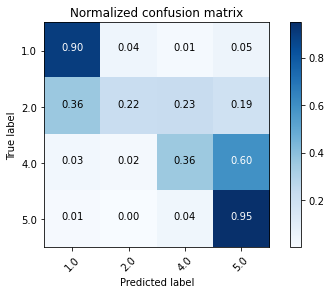

In [52]:
from sklearn import metrics
y_test = res['actual_encode']
y_pred = res['predicted']
class_names = [1.0, 2.0,4.0,5.0]


# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [53]:
print(misclassified.loc[1, 'text'])
print()
print(find_features(misclassified.loc[1, 'text']))

The pies are good, but I was very disappointed with the service and COVID-19 procedures. The pick-up process was slow and inefficient, and there is no distinction between people who ordered online or are placing orders in person, so ordering ahead did not appear to save me any time. The lines and spots marked for "social distancing" do not actually allow for social distancing because it winds back and forth. If everyone stood in the marked spot, I would essentially be standing right next to someone, so I did not feel very comfortable being asked to do so. While I was waiting for the cashier to finish entering another order in order to get mine, another employee started serving another customer and retrieving their pies before retrieving mine, which felt inefficient in terms of moving people through the line. It felt very disorganized and I believe more procedures can be put in place to streamline the pick-up process to ensure as little contact and waiting indoors as possible during COV